## Previsão de vendas - Geladeiras (Refrigadores)

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet

/Users/david/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


In [3]:
df = df[[x for x in df.columns if "REFRIGERADOR" in x]]
              
df.head()

,BEBEDOURO REFRIGERADOR 220V CJD20 ABBNA BR,GE1 REFRIGERADOR,GE2 REFRIGERADOR,REFRIGERADOR 2P RT38K5430SL/BZ FF 384 INOX,REFRIGERADOR 2P RT38K5530S8/BZ FF INVERT 384L,REFRIGERADOR BRASTEMP BRM44HBBNA 375L WH,REFRIGERADOR BRASTEMP BRM44HKBNA 375L PL,REFRIGERADOR BRASTEMP BRM56ABBNA 462L BR,REFRIGERADOR CLEAN BRM42EKBNA FROS FREE EVOX,REFRIGERADOR CONSUL 1PT 239L 220V CRC28FBBNA,...,REFRIGERADOR RCD 38 BR 220V,REFRIGERADOR RCD 38 INOX,REFRIGERADOR RDE33,REFRIGERADOR RE31,REFRIGERADOR RFE39 220V BR,REFRIGERADOR ROC 31 BR,REFRIGERADOR ROC 35 BR,REFRIGERADOR ROC 35 INOX,REFRIGERADOR TF39S FROST FREE PLATINUM,REFRIGERADOR TF51X INOX
2015-01-02,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-03,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,NaN
2015-01-05,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-06,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN
2015-01-07,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN


Existem 74 modelos distintos de refrigeradores na base de dados.

In [4]:
su = df.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

GE2 REFRIGERADOR                               331.0
GE1 REFRIGERADOR                               115.0
REFRIGERADOR ROC 31 BR                         104.0
REFRIGERADOR NR-BT40BD1WB 387L BCO              73.0
REFRIGERADOR RCD 38 BR 220V                     63.0
REFRIGERADOR RCD 34 BR                          61.0
REFRIGERADOR ROC 35 BR                          59.0
REFRIGERADOR CONSUL 2TPS.CRD37EBBNA 334L BR     56.0
REFRIGERADOR CONSUL 1PT.CRB39ABBNA 342L BR      39.0
BEBEDOURO REFRIGERADOR 220V CJD20 ABBNA BR      27.0
dtype: float64

Os modelos de refrigadores que mais possuem vendas são os genéricos 'GE2 REFRIGERADOR' e 'GE1 REFRIGERADOR', enquanto que o modelo verdadeiro que mais possui vendas é o [REFRIGERADOR ROC 31 BR](https://www.esmaltec.com.br/produtos/refrigerador-roc-31/), da fabricante Esmaltec. Preencheremos os valores na base de dados como simplesmente 0 e fazer o rearranjo da granularidade, com propósitos de fazer previsões por semana.

In [5]:
df.fillna(value=0, inplace=True)

In [6]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,BEBEDOURO REFRIGERADOR 220V CJD20 ABBNA BR,GE1 REFRIGERADOR,GE2 REFRIGERADOR,REFRIGERADOR 2P RT38K5430SL/BZ FF 384 INOX,REFRIGERADOR 2P RT38K5530S8/BZ FF INVERT 384L,REFRIGERADOR BRASTEMP BRM44HBBNA 375L WH,REFRIGERADOR BRASTEMP BRM44HKBNA 375L PL,REFRIGERADOR BRASTEMP BRM56ABBNA 462L BR,REFRIGERADOR CLEAN BRM42EKBNA FROS FREE EVOX,REFRIGERADOR CONSUL 1PT 239L 220V CRC28FBBNA,...,REFRIGERADOR RCD 38 BR 220V,REFRIGERADOR RCD 38 INOX,REFRIGERADOR RDE33,REFRIGERADOR RE31,REFRIGERADOR RFE39 220V BR,REFRIGERADOR ROC 31 BR,REFRIGERADOR ROC 35 BR,REFRIGERADOR ROC 35 INOX,REFRIGERADOR TF39S FROST FREE PLATINUM,REFRIGERADOR TF51X INOX
2015-01-08,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


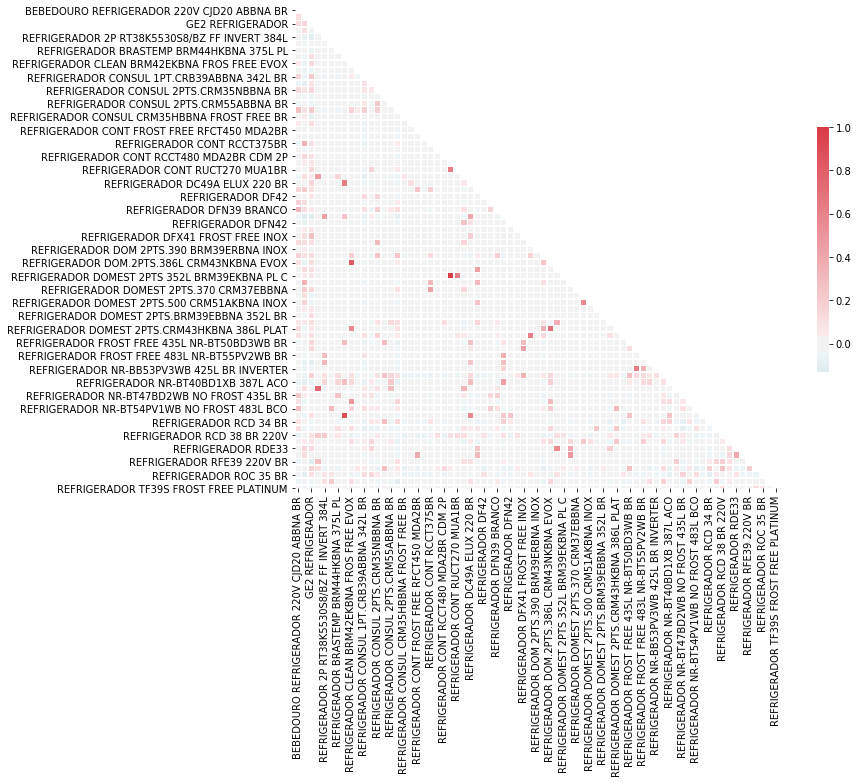

In [7]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Os refrigeradores genéricos tem algum nível de correlação não desprezível entre os outros modelos reais, seriam estes dois um agregado de outros produtos?

Quanto aos refrigeradores de verdade, percebe-se alguns pares com correlação forte, porém não aparenta haver tanta correlação entre a maior parte de modelos reais distintos.

Pares com correlação forte (p >= 0.7): 7


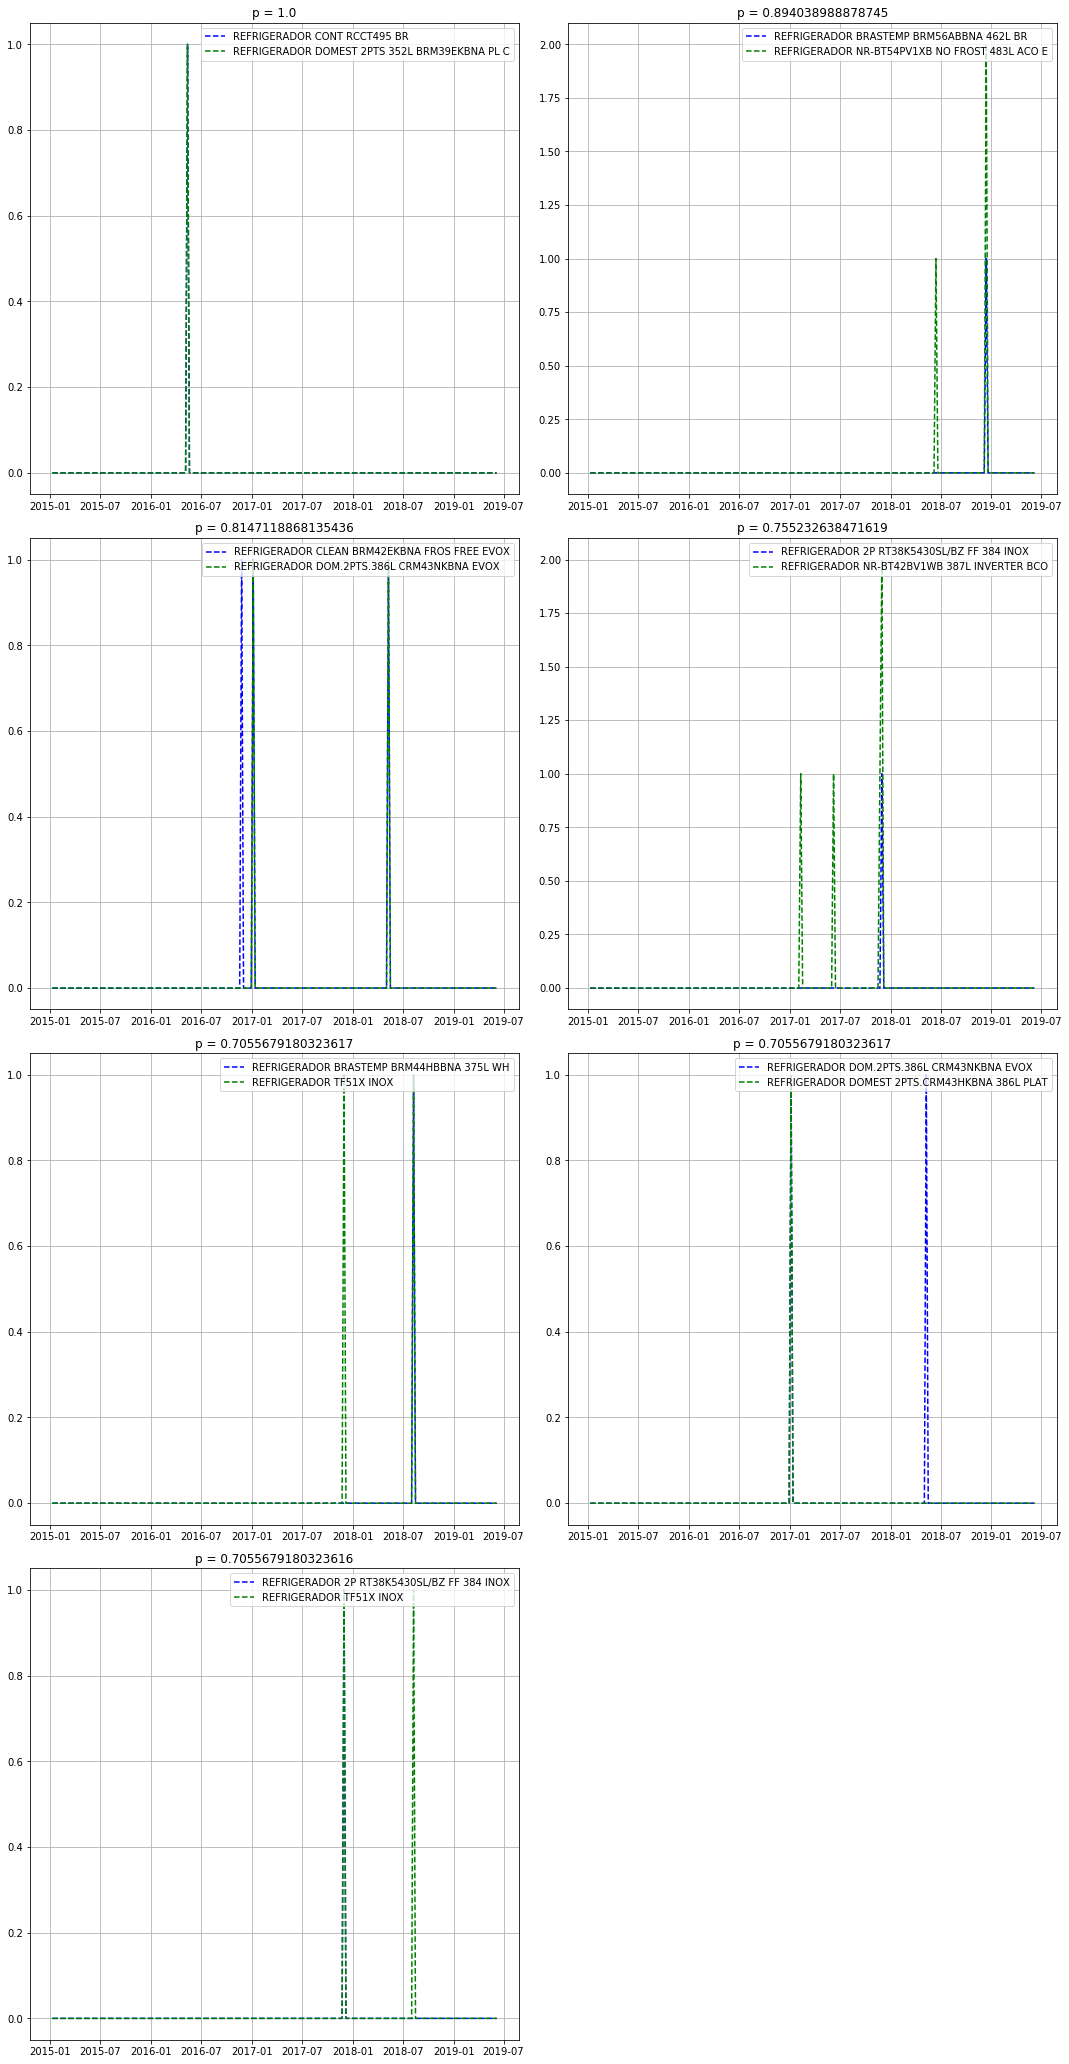

In [8]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Os pares com correlação forte tem tal valor por basicamente possuírem suas vendas concentradas em uma única semana.

Pares com correlação negativa (p <= 0.2): 0 


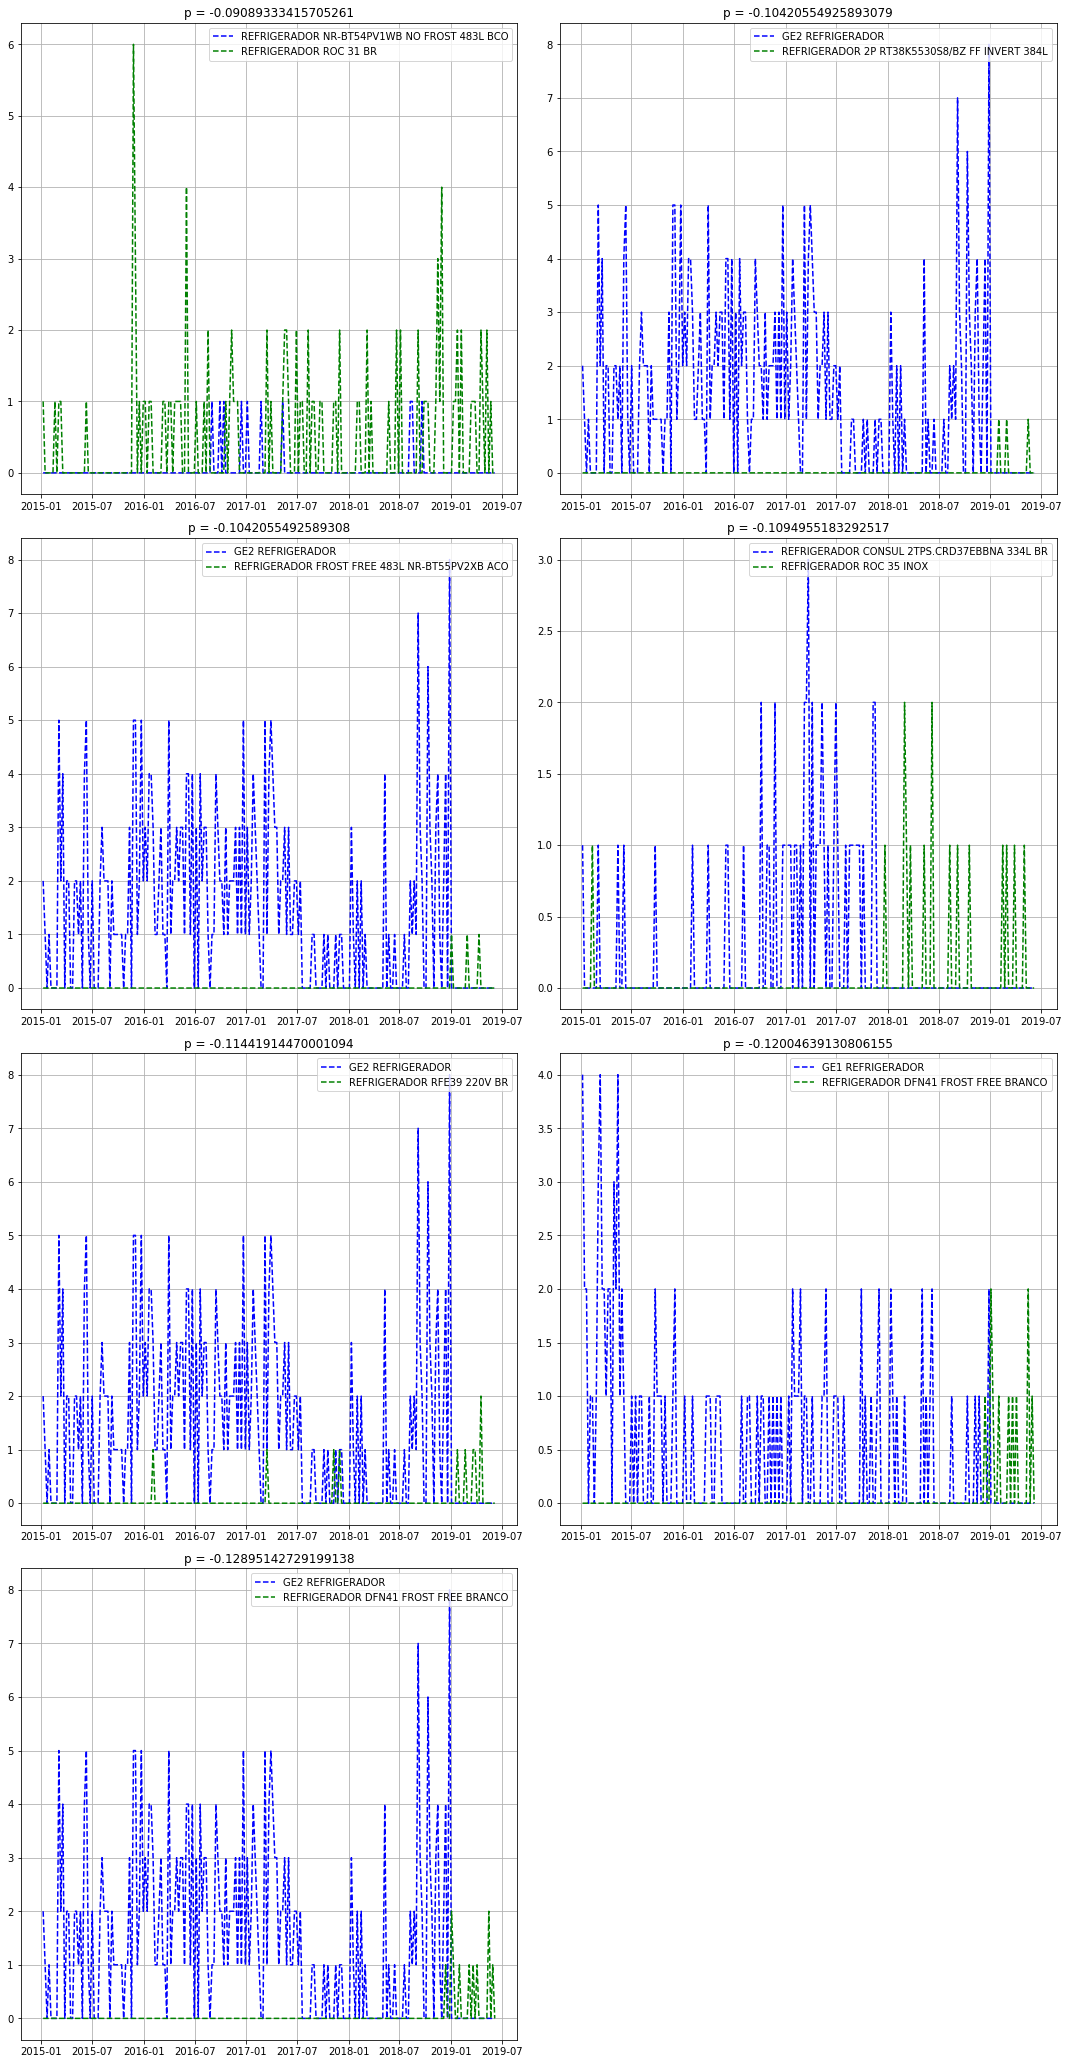

In [9]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Não há um par sequer com uma correlação com p <= -0.2. Como resultado, nenhuma série temporal de geladeira será agregada para criar uma "categoria" de geladeira. Vejamos a série temporal dos modelos reais com vendas acima de 50 no período:

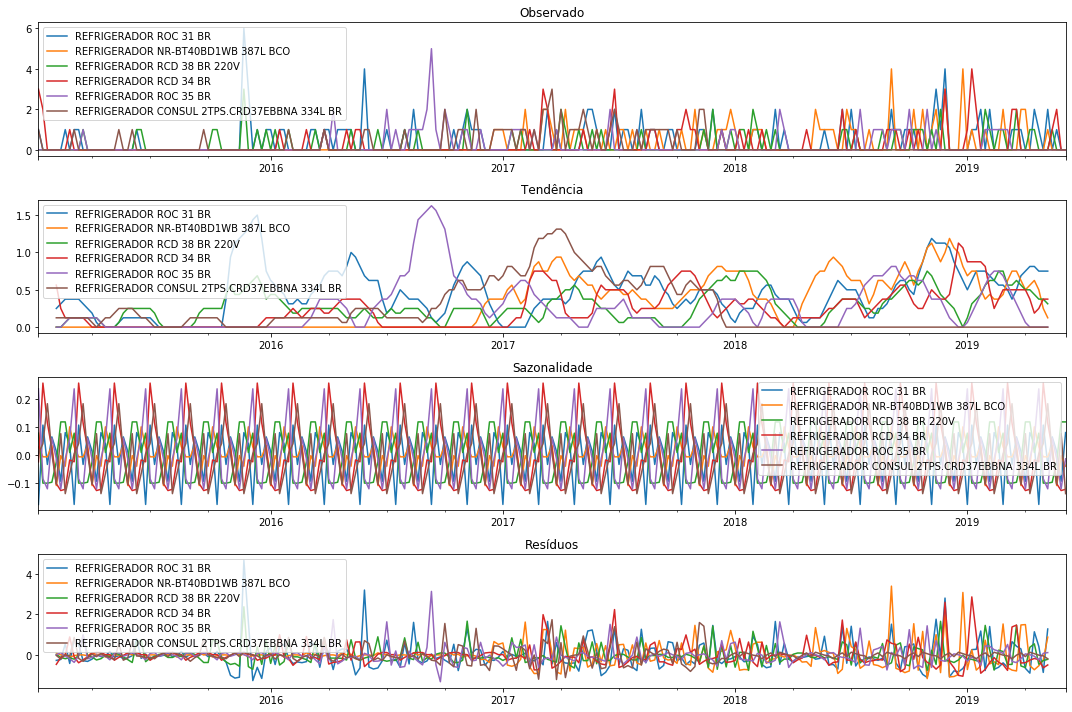

In [10]:
products = ['REFRIGERADOR ROC 31 BR', 'REFRIGERADOR NR-BT40BD1WB 387L BCO', 'REFRIGERADOR RCD 38 BR 220V', 'REFRIGERADOR RCD 34 BR', 'REFRIGERADOR ROC 35 BR', 'REFRIGERADOR CONSUL 2TPS.CRD37EBBNA 334L BR']
result = seasonal_decompose(dfw[products], model='additive', freq = 8)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,10))

#Plota
result.observed.plot(ax = ax1, title = "Observado")
result.trend.plot(ax = ax2, title = "Tendência")
result.seasonal.plot(ax = ax3, title = "Sazonalidade")
result.resid.plot(ax = ax4, title = "Resíduos")

plt.tight_layout()

Todos os modelos possuem as vendas distribuídas no período, contudo, nota-se uma certa descontinuidade nas vendas de cada produto, ou em outras palavras, várias semanas em que não são registradas vendas para tal produto, adicionalmente, pode-se afirmar que não há uma tendência de crescimento nas vendas de nenhum produto, logo poderá ser usada uma tendência de crescimento constante no modelo.

In [11]:
mothers = pd.DataFrame({
    'holiday': 'Dia das mães',
    'ds': ['2015-05-10', '2016-05-08', '2017-05-14', '2018-05-13', '2019-05-12'],
    'lower_window': -7,
    'upper_window': 0
})
fathers = pd.DataFrame({
    'holiday': 'Dia dos pais',
    'ds': ['2015-08-09', '2016-08-14', '2017-08-13', '2018-08-12', '2019-08-11'],
    'lower_window': -7,
    'upper_window': 0
})
valentines = pd.DataFrame({
    'holiday': 'Dia dos namorados',
    'ds': ['2015-06-12', '2016-06-12', '2017-06-12', '2018-06-12', '2018-06-12'],
    'lower_window': -7,
    'upper_window': 0
})
christmas = pd.DataFrame({
    'holiday': 'Natal',
    'ds': ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25'],
    'lower_window': -8, # Incluindo a véspera
    'upper_window': 0
})
bf = pd.DataFrame({
    'holiday': 'Black friday',
    'ds': ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-25', '2019-11-24'],
    'lower_window': -7,
    'upper_window': 0
})
childrens = pd.DataFrame({
    'holiday': 'Dia das crianças',
    'ds': ['2015-10-12', '2016-10-12', '2017-10-12', '2018-10-12', '2019-10-12'],
    'lower_window': -7,
    'upper_window': 0
})
easter = pd.DataFrame({
    'holiday': 'Páscoa',
    'ds': ['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21'], # Domingo de páscoa
    'lower_window': -7,
    'upper_window': 0
})
new_year = pd.DataFrame({
    'holiday': 'Ano Novo',
    'ds': ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
    'lower_window': -8, # Adicionar a véspera
    'upper_window': 0
})
carnival = pd.DataFrame({
    'holiday': 'Carnaval',
    'ds': ['2015-02-18', '2016-02-10', '2017-03-01', '2018-02-14', '2019-03-06'], # Quarta feira de cinzas
    'lower_window': -7, # Adicionar a véspera
    'upper_window': 0
})

holidays = pd.concat((mothers, fathers, valentines, christmas, bf, childrens, easter, new_year))

In [12]:
def createProphetDataFrame(column):
    df2 = pd.DataFrame({'ds': dfw.index, 'y':dfw[column].values})
    df2['floor'] = 0

    return df2

size_train = len(dfw[:'2018-01-01'])
size_test = len(dfw['2018-01-01':])    

In [13]:
forecasts = []
for product in products:
    ph = Prophet(daily_seasonality=False, holidays=holidays, growth='flat')
    ph.fit(createProphetDataFrame(product)[:size_train])

    future = ph.make_future_dataframe(periods=size_test, freq='W-THU')
    forecasts.append(ph.predict(future))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = []
mad = []
for forecast in forecasts:
    i = 0
    mse.append(mean_squared_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    mad.append(mean_absolute_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    i += 1


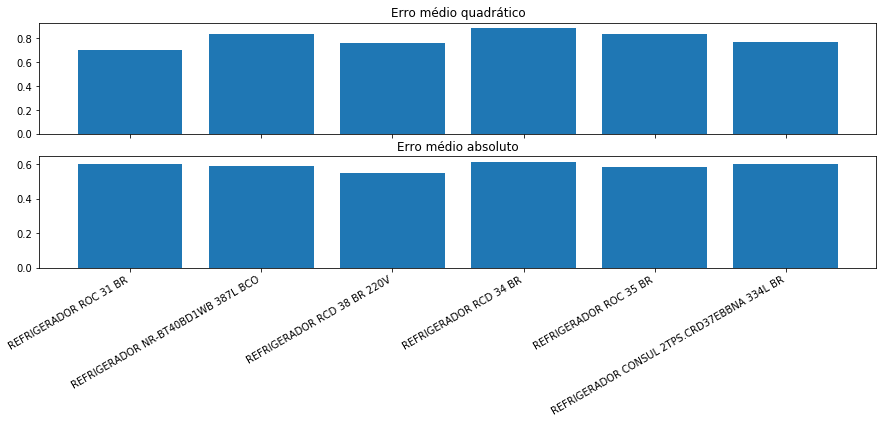

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))

ax1.bar(height=mse, x=products)
ax1.title.set_text('Erro médio quadrático')

ax2.bar(height=mad, x=products)
ax2.title.set_text('Erro médio absoluto')

fig.autofmt_xdate()
plt.show()    

Todos os erros situaram-se entre 0 e 1, contudo, vejamos a comparação da série temporal real e a prevista, referente ao modelo mais vendido destes, o 'REFRIGERADOR ROC 31 BR':

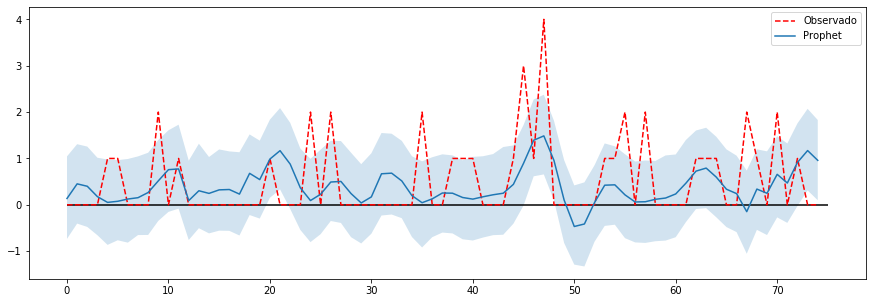

In [16]:
plt.figure(figsize = (15,5))
plt.plot(createProphetDataFrame(products[0])[size_train:]['y'].to_list(), 'r--')
plt.plot(forecasts[0][size_train:]['yhat'].to_list())
plt.hlines(xmin=0, xmax=size_test, y=0, color='black')
plt.fill_between(np.linspace(0, size_test-1, size_test), y1=forecasts[0][size_train:]['yhat_lower'], y2=forecasts[0][size_train:]['yhat_upper'], alpha = 0.2)
plt.legend(['Observado', 'Prophet'], loc ='upper right')
plt.show()

Percebe-se que durante o período em que não houveram vendas, o modelo previu o contrário, contudo, ele conseguiu prever com uma certa previsão o pico de vendas que há por volta da semana 45, ainda, vê-se que as vendas foram previstas como negativa por volta da semana 50 e também da 68, o que não acontece na realidade.

### Conclusão
A série temporal de vendas de geladeiras não possui a mesma característica de alguns modelos de smartphones, tanto que, vários modelos distintos possuem vendas distribuídas entre quase a totalidade da série temporal, e não foi percebida nenhuma característica do tipo de modelos iguais de cores distintas ou modelos diferentes de gerações diferentes.